In [1]:
import numpy as np 
from datetime import datetime
import os
import uuid
from EMQST_lib import adaptive_functions as ad
from EMQST_lib.qst import QST  
from EMQST_lib import measurement_functions as mf
from EMQST_lib import visualization as vis
from EMQST_lib import support_functions as sf
from EMQST_lib.povm import POVM
%load_ext autoreload
%autoreload 2

In [8]:
n_shots = 33000
n_qubits = 1
n_averages = 100
adaptive_burnin = 200

true_states = np.array([sf.generate_random_pure_state(n_qubits) for _ in range(n_averages)])
povm = POVM.generate_Pauli_POVM(n_qubits)
qst = QST(povm, true_states,n_shots,n_qubits,False,{})
print(f'Total shots: {n_shots * n_averages}')
infidelity_container = []
d_st = 0.001
qst_array = []
noise_strengths = []
for i in range(4):

    qst.perform_adaptive_BME(depolarizing_strength = i*d_st,
                             adaptive_burnin_steps = adaptive_burnin)
    infidelity_container.append(qst.get_infidelity())
    noise_strengths.append(i * d_st)
    qst_array.append(qst)
    
settings = {
    'n_shots': n_shots,
    'n_qubits': n_qubits,
    'n_averages': n_averages,
    'adaptive_burnin': adaptive_burnin,
    'noise_strengths': noise_strengths,
    'true_states': true_states,
}

path = "adaptive_results/one_qubit_infidelity"
now=datetime.now()
now_string = now.strftime("%Y-%m-%d_%H-%M-%S_")
dir_name= now_string+str(uuid.uuid4())
data_path=f'{path}/{dir_name}'
os.mkdir(data_path)

with open(f'{data_path}/infidelity_container.npy', 'wb') as f:
    np.save(f, infidelity_container)
with open(f'{data_path}/settings.npy', 'wb') as f:    
    np.save(f, settings)


[autoreload of _collections_abc failed: Traceback (most recent call last):
  File "/mnt/c/Users/adrian/OneDrive/Skrivebord/PhD/Code/REMQST/.work_linux_venv/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 283, in check
    superreload(m, reload, self.old_objects)
  File "/mnt/c/Users/adrian/OneDrive/Skrivebord/PhD/Code/REMQST/.work_linux_venv/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 483, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/importlib/__init__.py", line 111, in reload
    raise ImportError(f"module {name} not in sys.modules", name=name)
ImportError: module collections.abc not in sys.modules
]


Total shots: 3300000
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 1/100. Final infidelity: 7.013395364041664e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 2/100. Final infidelity: 5.7928989428246425e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 3/100. Final infidelity: 8.490566608054806e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 4/100. Final infidelity: 8.813095283521921e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 5/100. Final infidelity: 6.276145475181405e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 6/100. Final infidelity: 0.00010185020373754128.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 7/100. Final infidelity: 5.62114955161563

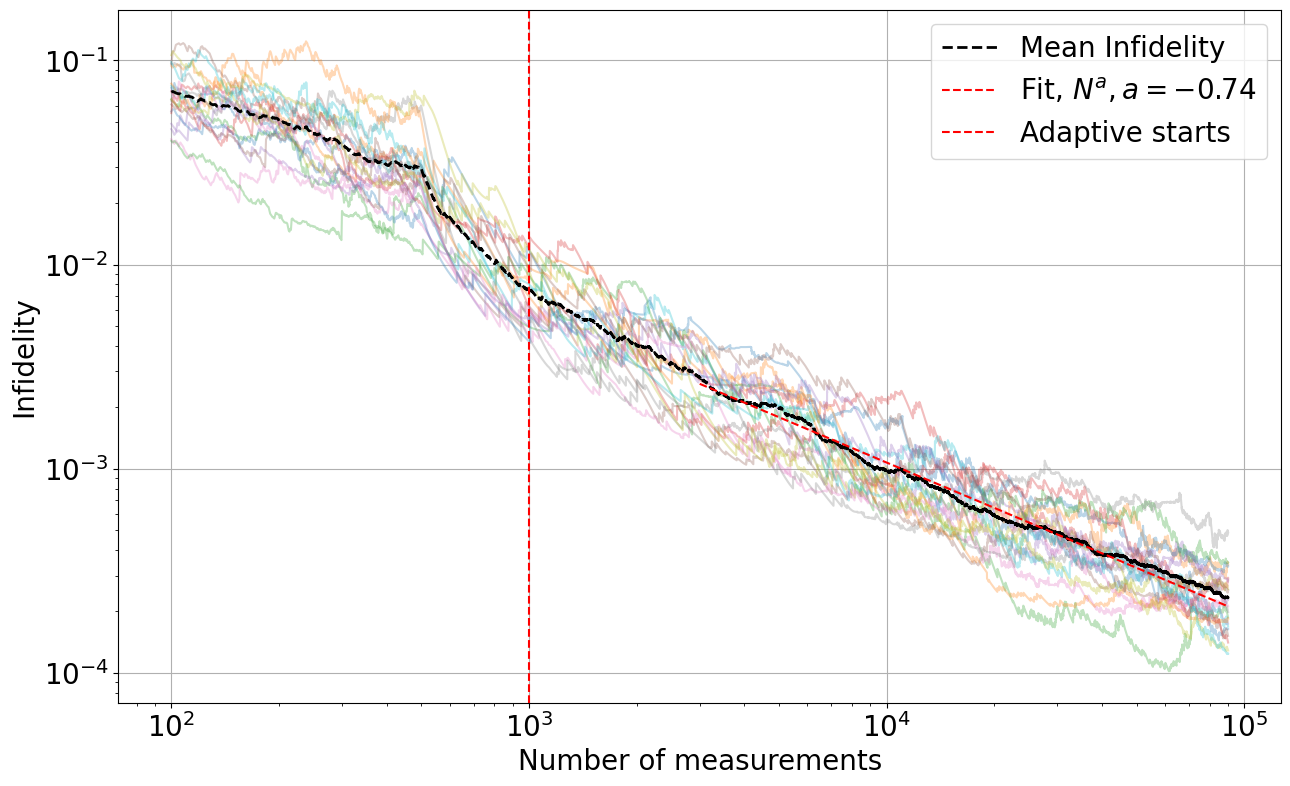

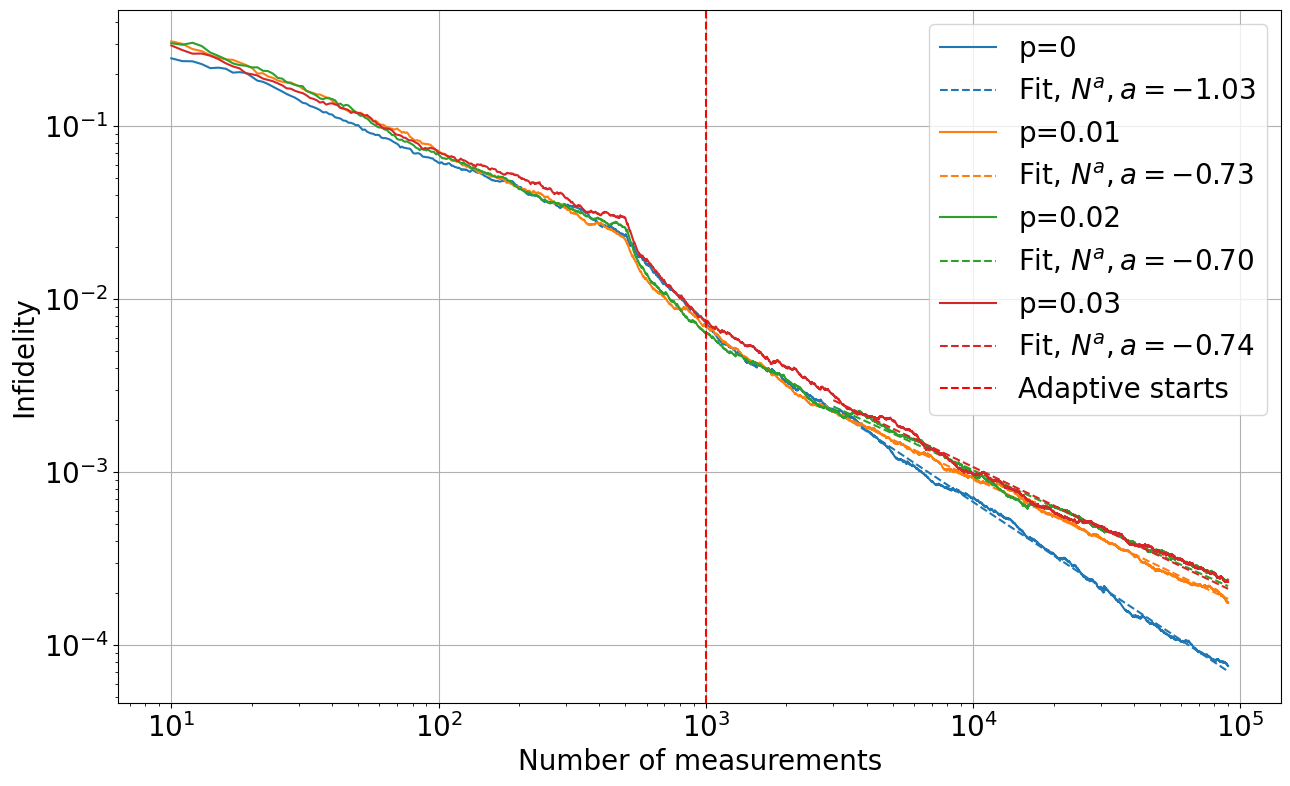

In [ ]:


vis.plot_infidelity_curves(qst)
labels = ['p=0', 'p=0.01', 'p=0.02', 'p=0.03', 'p=0.04']
vis.plot_average_infidelity(infidelity_container, labels = labels)
  


In [6]:
# Performing non-adaptive and adaptive QST comparison
n_shots = 33000
n_qubits = 1
n_averages = 100
adaptive_burnin = 200

true_states = np.array([sf.generate_random_pure_state(n_qubits) for _ in range(n_averages)])
povm = POVM.generate_Pauli_POVM(n_qubits)
qst_adaptive = QST(povm, true_states,n_shots,n_qubits,False,{})
qst_non_adaptive = QST(povm, true_states,n_shots,n_qubits,False,{})
print(f'Total shots: {n_shots * n_averages}')
noise_strength = 0

qst_adaptive.perform_adaptive_BME(depolarizing_strength =noise_strength,
                            adaptive_burnin_steps = adaptive_burnin)
qst_non_adaptive.perform_adaptive_BME()
infidelity_container=[qst_non_adaptive.get_infidelity(), qst_adaptive.get_infidelity()]
    
settings = {
    'n_shots': n_shots,
    'n_qubits': n_qubits,
    'n_averages': n_averages,
    'adaptive_burnin': [adaptive_burnin, n_shots],
    'noise_strengths': [0,0],
    'true_states': true_states,
}

path = "adaptive_results/adaptive_comparson"
now=datetime.now()
now_string = now.strftime("%Y-%m-%d_%H-%M-%S_")
dir_name= now_string+str(uuid.uuid4())
data_path=f'{path}/{dir_name}'
os.mkdir(data_path)

with open(f'{data_path}/infidelity_container.npy', 'wb') as f:
    np.save(f, infidelity_container)
with open(f'{data_path}/settings.npy', 'wb') as f:    
    np.save(f, settings)



Total shots: 3300000
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 1/100. Final infidelity: 2.8359960521195937e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 2/100. Final infidelity: 5.347880441330943e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 3/100. Final infidelity: 3.5279430356527364e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 4/100. Final infidelity: 7.27852102881954e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 5/100. Final infidelity: 7.343219450839378e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 6/100. Final infidelity: 3.826054970601511e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed ru

/mnt/c/Users/adrian/OneDrive/Skrivebord/PhD/Code/REMQST/EMQST_lib/qst.py:583: RuntimeWarning: invalid value encountered in log
  return np.dot(np.log(np.real(np.einsum('ij,kji->k',rho,full_operator_list)))[index_values],index_counts)


Completed run 15/100. Final infidelity: 4.3733722979943934e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 16/100. Final infidelity: 4.4476116572322866e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 17/100. Final infidelity: 0.00010920660715074693.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 18/100. Final infidelity: 9.41189703831391e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 19/100. Final infidelity: 8.457909912862327e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 20/100. Final infidelity: 6.388468041651496e-05.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 21/100. Final infidelity: 5.4781774280532325e-05.
Resampling
Resampling
Resampling
Resampling
Resamp